In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_fashion_mnist_data()
print(f"x_train.shape = {x_train.shape}, x_val.shape = {x_val.shape}")

x_train.shape = (55000, 28, 28), x_val.shape = (5000, 28, 28)


In [3]:
utils.reset_session()

recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
], name='recurrent_encoder')
recurrent_encoder.summary()

recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation='sigmoid'))
], name='recurrent_decoder')
recurrent_decoder.summary()

autoencoder = keras.models.Sequential([recurrent_encoder, recurrent_decoder])

autoencoder.compile(
    loss='binary_crossentropy', 
    optimizer=keras.optimizers.SGD(0.1),
    metrics=[utils.rounded_accuracy]
)

history = autoencoder.fit(
    x_train, x_train, 
    epochs=10,
    validation_data=(x_val, x_val)
)

Model: "recurrent_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 100)           51600     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                15720     
Total params: 67,320
Trainable params: 67,320
Non-trainable params: 0
_________________________________________________________________
Model: "recurrent_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector (RepeatVector) (None, 28, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 28, 100)           52400     
_________________________________________________________________
time_distributed (TimeDistri (None, 28, 28)            2828      
Total params: 55,2

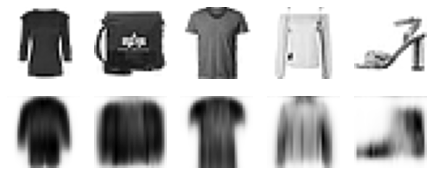

In [4]:
utils.reconstruct(autoencoder, x_val[:5])